# Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Amazon-Products.csv")

In [ ]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [ ]:
print(df.isnull().sum())  # Count missing values per column

Unnamed: 0            0
name                  0
main_category         1
sub_category          1
image                 1
link                  1
ratings           26162
no_of_ratings     26162
discount_price    11513
actual_price       2611
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157976 entries, 0 to 157975
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      157976 non-null  int64 
 1   name            157976 non-null  object
 2   main_category   157975 non-null  object
 3   sub_category    157975 non-null  object
 4   image           157975 non-null  object
 5   link            157975 non-null  object
 6   ratings         131814 non-null  object
 7   no_of_ratings   131814 non-null  object
 8   discount_price  146463 non-null  object
 9   actual_price    155365 non-null  object
dtypes: int64(1), object(9)
memory usage: 12.1+ MB


## Cleaning

In [ ]:
# df.drop(columns=["Unnamed: 0", "image", "link"], inplace=True)
df.drop(columns=["image", "link"], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157976 entries, 0 to 157975
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      157976 non-null  int64 
 1   name            157976 non-null  object
 2   main_category   157975 non-null  object
 3   sub_category    157975 non-null  object
 4   ratings         131814 non-null  object
 5   no_of_ratings   131814 non-null  object
 6   discount_price  146463 non-null  object
 7   actual_price    155365 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.6+ MB


In [ ]:
print(df.isnull().sum())  # Count missing values per column

Unnamed: 0            0
name                  0
main_category         1
sub_category          1
ratings           26162
no_of_ratings     26162
discount_price    11513
actual_price       2611
dtype: int64


In [ ]:
df.dropna(subset=['main_category', 'sub_category', 'actual_price', 'discount_price'], inplace=True)

In [ ]:
print(df.isnull().sum())  # Count missing values per column

Unnamed: 0            0
name                  0
main_category         0
sub_category          0
ratings           22746
no_of_ratings     22746
discount_price        0
actual_price          0
dtype: int64


In [ ]:
## change type of ratings into float
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')  # Convert to float

In [ ]:
df['discount_price'] = pd.to_numeric(df['discount_price'].str.replace(r'\D', '', regex=True), errors='coerce')

In [ ]:
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace(r'\D', '', regex=True), errors='coerce')

In [ ]:
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].str.replace(',', ''), errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146463 entries, 0 to 157974
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      146463 non-null  int64  
 1   name            146463 non-null  object 
 2   main_category   146463 non-null  object 
 3   sub_category    146463 non-null  object 
 4   ratings         122688 non-null  float64
 5   no_of_ratings   122688 non-null  float64
 6   discount_price  146463 non-null  int64  
 7   actual_price    146463 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 10.1+ MB


In [ ]:
print(df.isnull().sum())  # Count missing values per column

Unnamed: 0            0
name                  0
main_category         0
sub_category          0
ratings           23775
no_of_ratings     23775
discount_price        0
actual_price          0
dtype: int64


In [ ]:
print(f"Total duplicates: {df.duplicated().sum()}")

Total duplicates: 0


In [ ]:
df['ratings'].fillna(df['ratings'].median(), inplace=True)

<ipython-input-190-b4cca30ecd43>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ratings'].fillna(df['ratings'].median(), inplace=True)


In [ ]:
df['no_of_ratings'].fillna(df['no_of_ratings'].median(), inplace=True)

<ipython-input-191-647af9168f27>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_ratings'].fillna(df['no_of_ratings'].median(), inplace=True)


In [ ]:
# # change no_of_ratings to int
# df['no_of_ratings'] = df['no_of_ratings'].astype(int)

In [ ]:
# df.drop(columns=["Unnamed: 0", "image", "link"], inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
print(f"Total duplicates: {df.duplicated().sum()}") ##Gapapa karna pas dah diliat textnya beda2 tp mungkin angkanya ada yg sama

Total duplicates: 5233


In [ ]:
## Standardize Text Data

import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
        text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
        text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply text cleaning to relevant columns
df["name"] = df["name"].apply(clean_text)
df["main_category"] = df["main_category"].apply(clean_text)
df["sub_category"] = df["sub_category"].apply(clean_text)

In [ ]:
#Normalize min max for ratings

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["ratings"]] = scaler.fit_transform(df[["ratings"]])

In [ ]:
#Normalize Standardization for no_of_ratings, discount_price, actual_price
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['no_of_ratings', 'discount_price', 'actual_price']] = scaler.fit_transform(df[['no_of_ratings', 'discount_price', 'actual_price']])

In [ ]:
df.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,146463.000000,146463.000000,1.464630e+05,1.464630e+05
mean,3.872751,1201.961410,5.177436e+03,4.702354e+03
std,0.603547,11290.652529,4.556837e+04,5.178014e+04
min,1.000000,1.000000,8.000000e+00,1.000000e+01
25%,3.700000,11.000000,3.580000e+02,9.500000e+02
50%,3.900000,45.000000,6.030000e+02,1.511000e+03
75%,4.200000,185.000000,1.300000e+03,2.999000e+03
max,5.000000,589547.000000,6.669526e+06,6.176505e+06


In [ ]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,lloyd 15 ton 3 star inverter split ac 5 in 1 c...,appliances,air conditioners,4.2,2255.0,32999,58990
1,lg 15 ton 5 star ai dual inverter split ac cop...,appliances,air conditioners,4.2,2948.0,46490,75990
2,lg 1 ton 4 star ai dual inverter split ac copp...,appliances,air conditioners,4.2,1206.0,34490,61990
3,lg 15 ton 3 star ai dual inverter split ac cop...,appliances,air conditioners,4.0,69.0,37990,68990
4,carrier 15 ton 3 star inverter split ac copper...,appliances,air conditioners,4.1,630.0,34490,67790


In [ ]:
df.to_csv("cleaned_amazon_products.csv", index=False)

# EDA

In [ ]:
df=pd.read_csv("cleaned_amazon_products.csv")

In [ ]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,lloyd 15 ton 3 star inverter split ac 5 in 1 c...,appliances,air conditioners,4.2,2255.0,32999,58990
1,lg 15 ton 5 star ai dual inverter split ac cop...,appliances,air conditioners,4.2,2948.0,46490,75990
2,lg 1 ton 4 star ai dual inverter split ac copp...,appliances,air conditioners,4.2,1206.0,34490,61990
3,lg 15 ton 3 star ai dual inverter split ac cop...,appliances,air conditioners,4.0,69.0,37990,68990
4,carrier 15 ton 3 star inverter split ac copper...,appliances,air conditioners,4.1,630.0,34490,67790


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146463 entries, 0 to 146462
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            146463 non-null  object 
 1   main_category   146463 non-null  object 
 2   sub_category    146463 non-null  object 
 3   ratings         146463 non-null  float64
 4   no_of_ratings   146463 non-null  float64
 5   discount_price  146463 non-null  int64  
 6   actual_price    146463 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 7.8+ MB


<ipython-input-10-08f57cd38234>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_expensive, x='actual_price', y='name', palette='Reds_r')


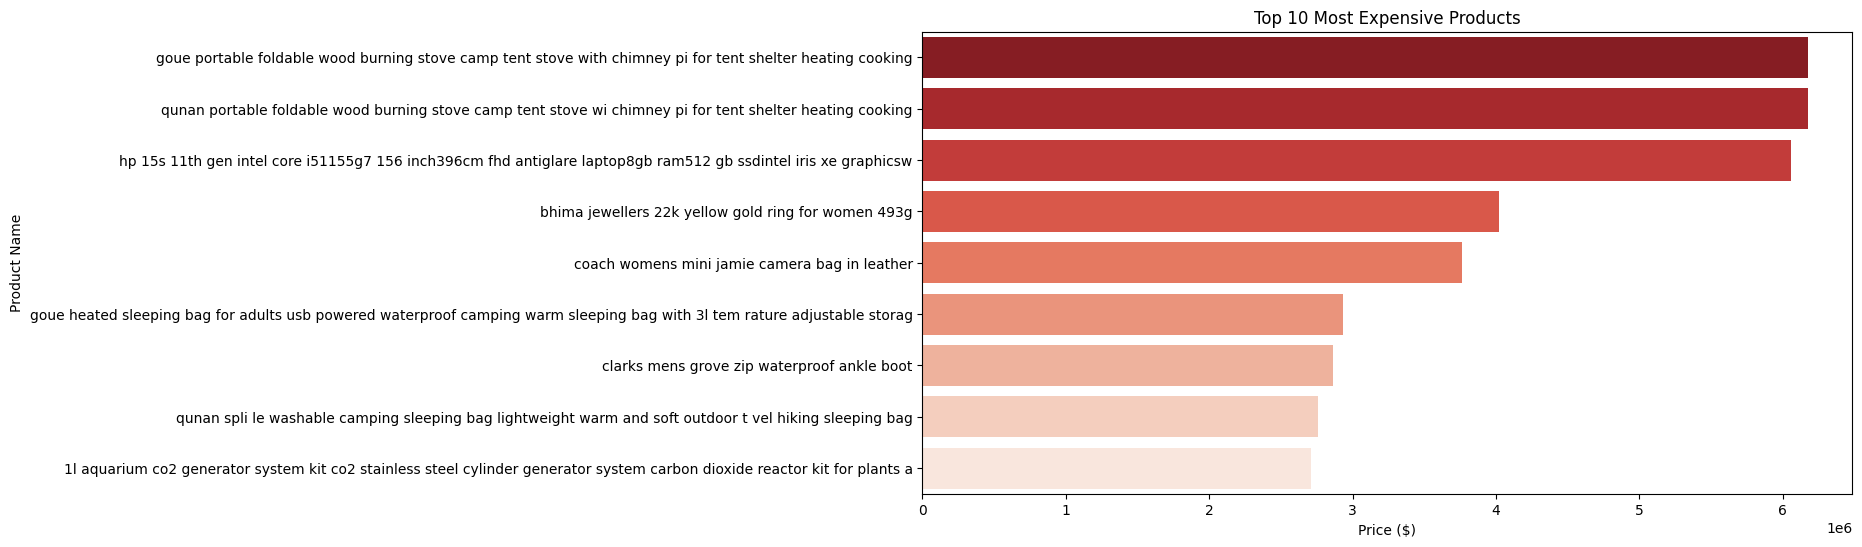

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Most Expensive Products
plt.figure(figsize=(12, 6))
top_expensive = df.nlargest(10, 'actual_price')
sns.barplot(data=top_expensive, x='actual_price', y='name', palette='Reds_r')
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Price ($)")
plt.ylabel("Product Name")
plt.show()

<ipython-input-6-fcf037abeb4c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cheap, x='actual_price', y='name', palette='Blues_r')


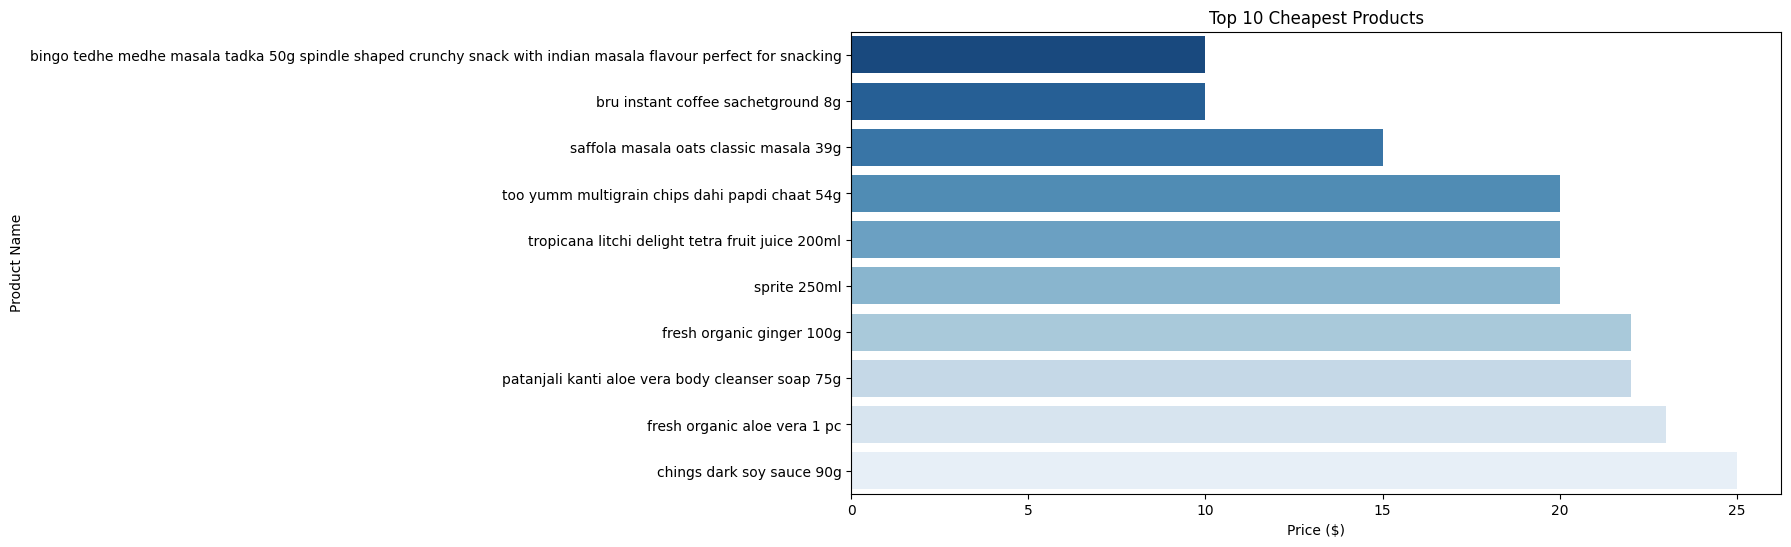

In [ ]:
# 2. Cheapest Products
plt.figure(figsize=(12, 6))
top_cheap = df.nsmallest(10, 'actual_price')
sns.barplot(data=top_cheap, x='actual_price', y='name', palette='Blues_r')
plt.title("Top 10 Cheapest Products")
plt.xlabel("Price ($)")
plt.ylabel("Product Name")
plt.show()


<ipython-input-7-758e6e2d6c05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_rated, x='ratings', y='name', palette='Greens_r')


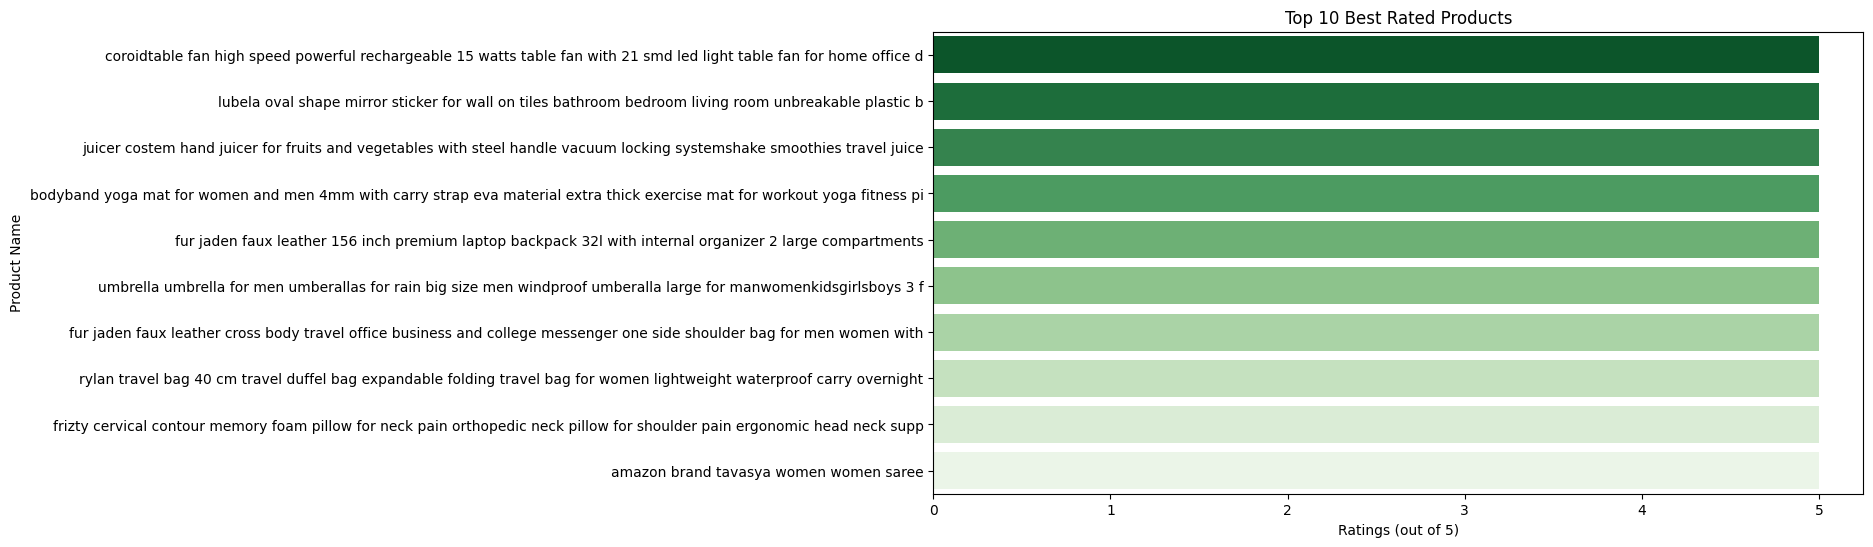

In [ ]:
# 3. Best Rated Products
plt.figure(figsize=(12, 6))
best_rated = df[df['no_of_ratings'] > 50].nlargest(10, 'ratings')
sns.barplot(data=best_rated, x='ratings', y='name', palette='Greens_r')
plt.title("Top 10 Best Rated Products")
plt.xlabel("Ratings (out of 5)")
plt.ylabel("Product Name")
plt.show()

<ipython-input-8-3e29b35a3133>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_rated, x='ratings', y='name', palette='Oranges_r')


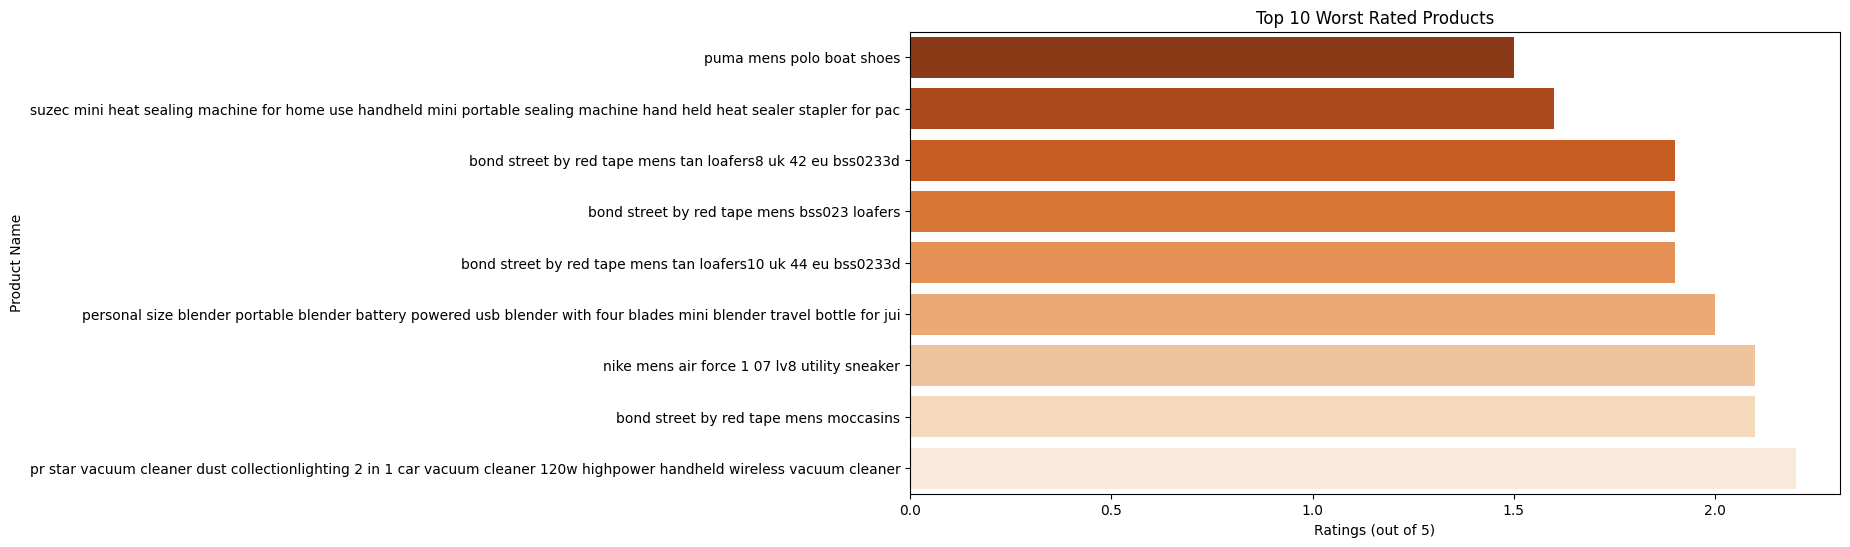

In [ ]:
# 4. Worst Rated Products
plt.figure(figsize=(12, 6))
worst_rated = df[df['no_of_ratings'] > 50].nsmallest(10, 'ratings')
sns.barplot(data=worst_rated, x='ratings', y='name', palette='Oranges_r')
plt.title("Top 10 Worst Rated Products")
plt.xlabel("Ratings (out of 5)")
plt.ylabel("Product Name")
plt.show()